<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%202/Modulo_2_Ejercicio_4_EDA_Visualizacion_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejercicio 4: Análisis Exploratorio de Datos (EDA) y Visualización (Nivel: Intermedio-Avanzado)**
## Aplicación de técnicas de EDA y visualización para comprender la estructura de los datos.



## Introducción

En este ejercicio, realizaremos un **Análisis Exploratorio de Datos (EDA)** para comprender la estructura y relaciones de los datos en un contexto de control de calidad industrial.  
El análisis exploratorio permite identificar patrones, anomalías y relaciones entre variables antes de aplicar modelos de Machine Learning.

### Objetivos del ejercicio:
- Calcular estadísticas avanzadas: **percentiles, kurtosis, skewness**.
- Analizar la distribución de las variables mediante **histogramas y boxplots**.
- Identificar correlaciones entre variables utilizando una **matriz de correlación y un heatmap**.
- Explorar la evolución de los datos en el tiempo con **gráficos de líneas**.
- Generar **insights y conclusiones** a partir de las visualizaciones.

### Conceptos clave:
- Análisis exploratorio (EDA)  
- Matriz de correlación  
- Interpretación de visualizaciones  


In [1]:

# Celda 1: Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# Configuración de estilos para visualización
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerías importadas correctamente.")


Librerías importadas correctamente.



## Descripción del Dataset

Para este ejercicio, utilizaremos el dataset **"Control de calidad en motores industriales"**, alojado en GitHub.  
Este dataset contiene información sobre la vida útil y desempeño de motores industriales.

### **Fuente del dataset:**  
- **CSV:** [Control de calidad en motores industriales](https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_motores_industriales.csv)

### **Estructura del dataset:**
| Columna                | Descripción |
|------------------------|-------------|
| ID_motor              | Identificador único del motor |
| Horas_operación       | Horas de funcionamiento |
| Temperatura_núcleo    | Temperatura del núcleo en °C |
| Vibración            | Frecuencia de vibración en Hz |
| Consumo_energía      | Consumo energético en kWh |
| Presión_sistema      | Presión del sistema en bar |
| Corriente_motor      | Corriente en Amperios |
| Velocidad_rotación   | Velocidad de rotación en RPM |
| Desgaste_rodamientos | Desgaste medido en mm |
| Fecha_instalación    | Fecha en la que se instaló el motor |
| Vida_util_restante   | Variable objetivo: estimación de la vida útil restante en horas |


In [2]:

# Celda 2: Cargar el dataset desde GitHub

url_csv = "https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_motores_industriales.csv"
df = pd.read_csv(url_csv, parse_dates=["Fecha_instalación"])

# Mostrar las primeras filas del dataset
df.head()


,ID_motor,Horas_operación,Temperatura_núcleo,Vibración,Consumo_energía,Presión_sistema,Corriente_motor,Velocidad_rotación,Desgaste_rodamientos,Tipo_aceite,Fecha_instalación,Vida_util_restante
0,1,22483.570765,60.194280,50.788378,169.217891,4.890675,12.739756,3206.390527,0.446148,Aceite_C,2017-09-08,6796.483961
1,2,19308.678494,69.450144,55.628975,142.600705,5.191469,9.783470,3886.599281,0.729206,Aceite_A,2015-08-17,8435.835741
2,3,23238.442691,74.129716,53.411020,138.408382,5.367571,7.833826,2238.014366,0.349589,Aceite_C,2019-03-12,5812.314665
3,4,27615.149282,81.496689,37.220858,168.666243,4.408318,12.783922,2908.111788,0.637520,Aceite_D,2016-05-20,0.000000
4,5,18829.233126,90.241623,48.137797,95.369205,5.050369,9.773646,2948.707353,0.532590,Aceite_C,2022-11-05,3043.413697


In [7]:

# Celda 3: Cálculo de estadísticas avanzadas

# Seleccionar solo las columnas numéricas (excluyendo datetime)
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calcular estadísticas avanzadas solo para variables numéricas
estadisticas = df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75])
estadisticas.loc["kurtosis"] = df[numerical_cols].kurtosis()
estadisticas.loc["skewness"] = df[numerical_cols].skew()

print("Estadísticas avanzadas calculadas.")
estadisticas



Estadísticas avanzadas calculadas.


,ID_motor,Horas_operación,Temperatura_núcleo,Vibración,Consumo_energía,Presión_sistema,Corriente_motor,Velocidad_rotación,Desgaste_rodamientos,Vida_util_restante
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,19998.225501,80.002355,52.554125,150.073830,5.125828,10.004498,2995.491462,0.500446,4988.248172
std,8660.398374,4993.338452,10.048639,21.713066,19.994214,1.062090,1.990656,501.801119,0.099575,1990.582943
min,1.000000,387.998742,35.343961,5.370315,74.347690,3.000334,2.637920,812.978601,0.058611,0.000000
25%,7500.750000,16614.002922,73.205970,43.485282,136.627901,4.671080,8.659180,2659.022559,0.432872,3639.716866
50%,15000.500000,20009.364842,80.033086,50.299583,150.154682,5.011530,9.994661,2998.251579,0.500667,4983.090021
75%,22500.250000,23374.494416,86.845988,57.244945,163.498108,5.363604,11.341908,3334.269260,0.567838,6319.249441
max,30000.000000,42395.421255,117.453792,375.371764,234.040518,18.265578,17.953736,4891.093924,0.867819,12756.433756
kurtosis,-1.200000,0.007044,-0.005488,52.378910,0.019338,43.130104,-0.016860,-0.005722,0.011403,-0.099701
skewness,0.000000,0.000696,-0.027814,6.133764,-0.000014,5.640520,0.004676,-0.019850,-0.019657,0.039568


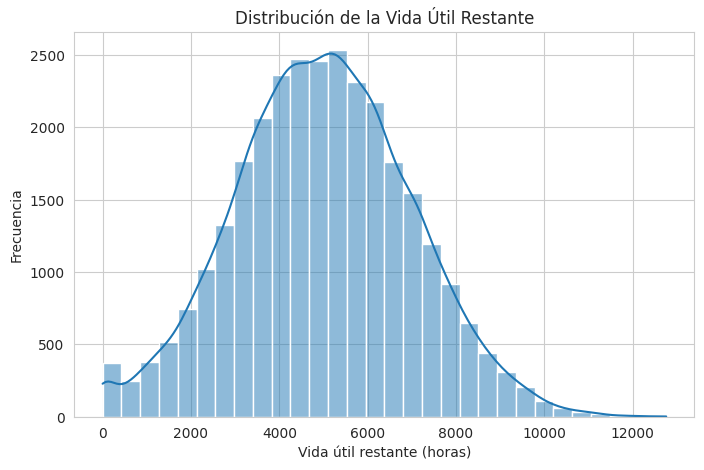

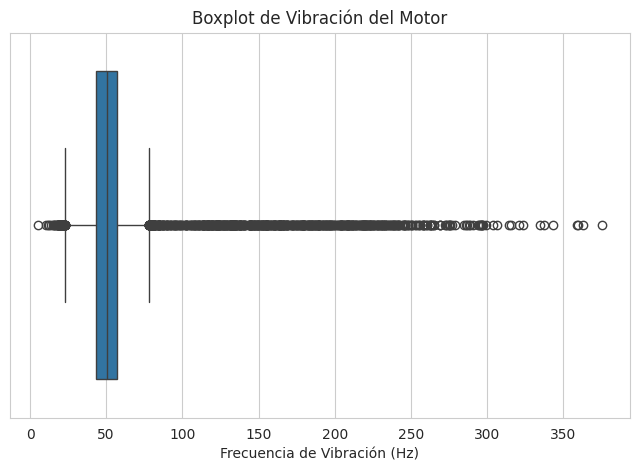

In [8]:

# Celda 4: Análisis de la distribución con histogramas y boxplots

# Histograma de la variable Vida_util_restante
plt.figure(figsize=(8,5))
sns.histplot(df["Vida_util_restante"], bins=30, kde=True)
plt.title("Distribución de la Vida Útil Restante")
plt.xlabel("Vida útil restante (horas)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de la variable Vibración
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Vibración"])
plt.title("Boxplot de Vibración del Motor")
plt.xlabel("Frecuencia de Vibración (Hz)")
plt.show()


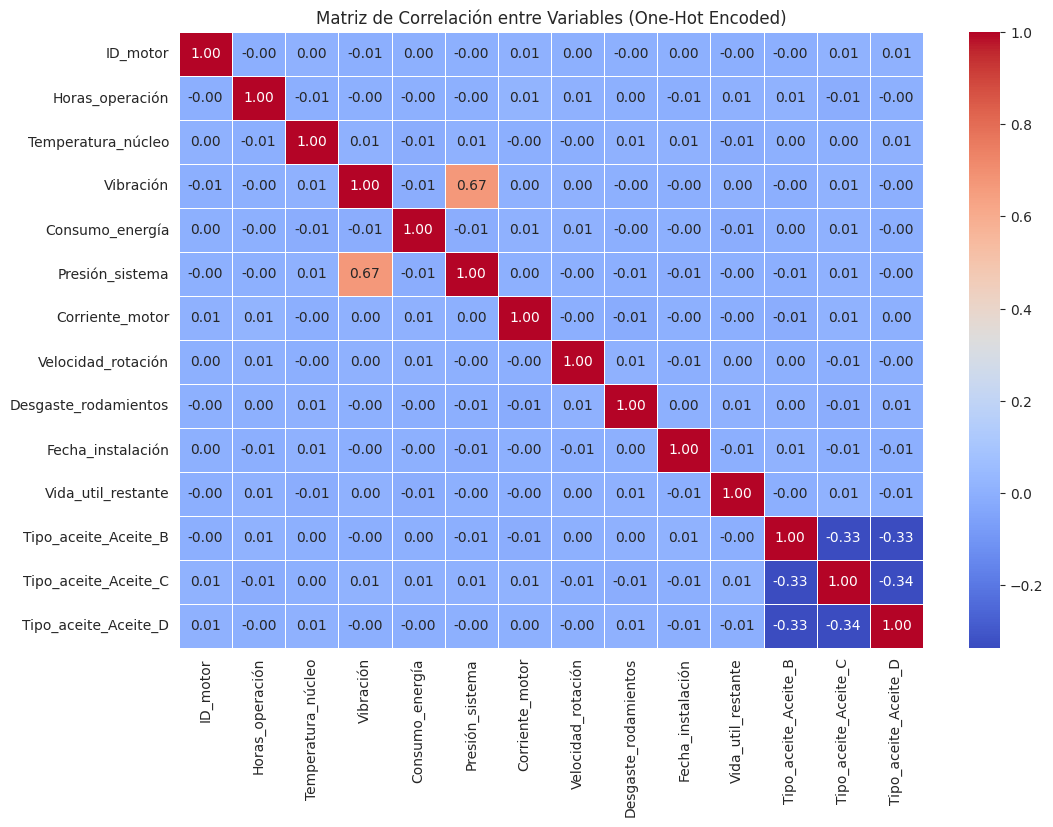

In [9]:

# Celda 5: Matriz de correlación con One-Hot Encoding

# Aplicar One-Hot Encoding a las variables categóricas antes de calcular la correlación
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlacion = df_encoded.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables (One-Hot Encoded)")
plt.show()


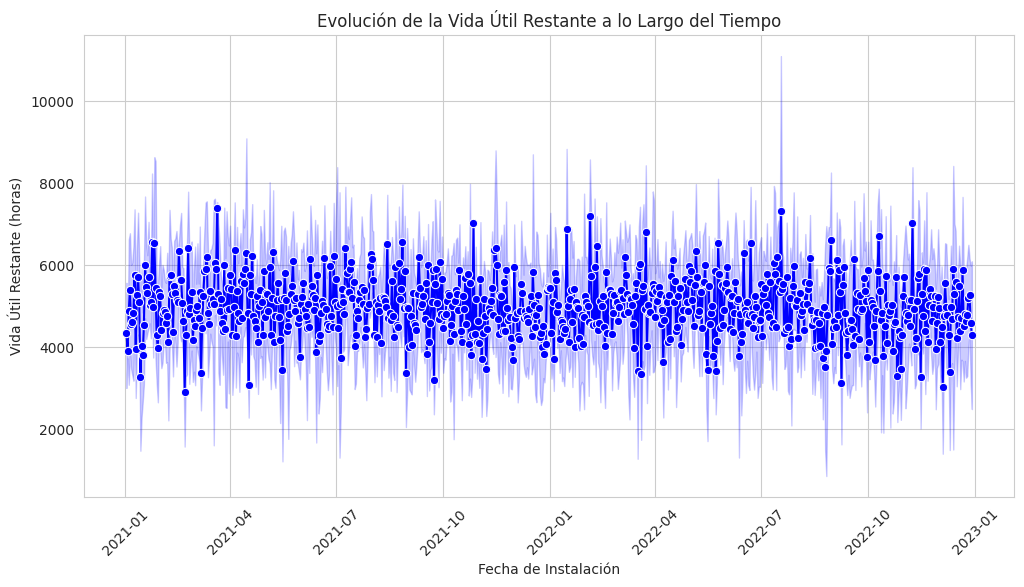

In [14]:

# Celda 6: Análisis de la evolución temporal de la vida útil restante

# Convertir fecha de instalación a datetime y ordenar por fecha
df["Fecha_instalación"] = pd.to_datetime(df["Fecha_instalación"], errors='coerce')
df_sorted = df.sort_values("Fecha_instalación")

# Filtrar fechas posteriores a 2021-01-01
df_filtered = df_sorted[df_sorted["Fecha_instalación"] > '2021-01-01']

# Graficar la evolución de la vida útil restante en el tiempo
plt.figure(figsize=(12,6))
sns.lineplot(x="Fecha_instalación", y="Vida_util_restante", data=df_filtered, marker="o", color="b")
plt.title("Evolución de la Vida Útil Restante a lo Largo del Tiempo")
plt.xlabel("Fecha de Instalación")
plt.ylabel("Vida Útil Restante (horas)")
plt.xticks(rotation=45)
plt.show()



## Conclusiones

En este ejercicio hemos aplicado técnicas de **Análisis Exploratorio de Datos (EDA)** para comprender la estructura de los datos en motores industriales.

### Puntos clave:
- Se calcularon **estadísticas avanzadas** como percentiles, kurtosis y skewness para evaluar la distribución de los datos.
- Se analizaron **distribuciones** con histogramas y boxplots, identificando posibles valores atípicos.
- Se generó una **matriz de correlación** para explorar relaciones entre variables clave.
- Se realizó un **análisis temporal** para evaluar la evolución de la vida útil restante en el tiempo.

### Posibles mejoras:
- Aplicar técnicas para la detección y eliminación de valores atípicos en variables críticas.
- Descomponer la variable de fecha de instalación en componentes (año, mes, día) para análisis más detallados.
- Explorar relaciones no lineales entre variables con técnicas de Machine Learning.
